In [4]:
import math
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt


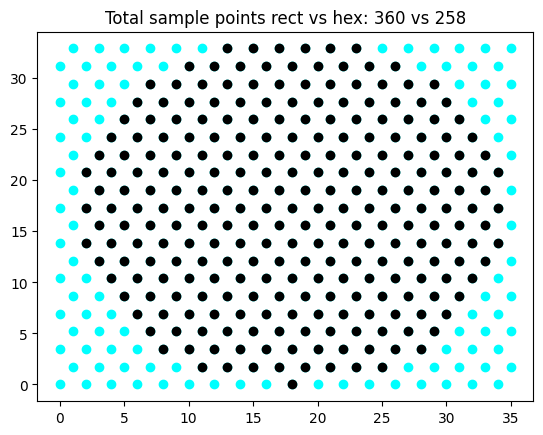

In [23]:
def generate_grid(arena_height, arena_width, spacing, is_hexagonal=False, is_cylinder=False):
    if is_hexagonal:
        hexagon_size = spacing / math.sqrt(3)
        num_columns = math.ceil(arena_width / (1.5 * hexagon_size))
        num_rows = math.ceil(arena_height / ((hexagon_size * math.sqrt(3))))

    else:
        num_columns = math.ceil(arena_width / spacing)
        num_rows = math.ceil(arena_height / spacing)
        
   
    if is_cylinder:
        radius_x = arena_width / 2
        radius_y = arena_height / 2
        # offset_x = (arena_width - num_columns * spacing) / 2  # Adjust the x-offset
        # offset_y = (arena_height - num_rows * spacing) / 2   
        # offset_y = offset_x
    else:
        radius_x = None
        radius_y = None
    
    offset_x = offset_y = 0

    if is_hexagonal:
        # print(offset_x, offset_y, num_columns, num_rows, hexagon_size)
        columns = range(num_columns)
        rows = range(num_rows)
        grid = list(
            map(
                lambda row: list(
                    map(
                        lambda col: (
                            col * (1.5 * hexagon_size) + offset_x,
                            row * (hexagon_size * math.sqrt(3)) + ((col % 2) * (hexagon_size * math.sqrt(3) / 2)) + offset_y
                        ),
                        filter(
                            lambda col: not radius_x or math.sqrt(
                                ((col * (1.5 * hexagon_size) + offset_x) - radius_x) ** 2 +
                                ((row * (hexagon_size * math.sqrt(3))) + ((col % 2) * (hexagon_size * math.sqrt(3) / 2)) - radius_y) ** 2
                            ) <= radius_x,
                            columns
                        )
                    )
                ),
                rows
            )
        )
    else:
        columns = range(num_columns)
        rows = range(num_rows)
        grid = list(
            map(
                lambda row: list(
                    map(
                        lambda col: (
                            col * spacing + offset_x,
                            row * spacing + offset_y
                        ),
                        filter(
                            lambda col: not radius_x or math.sqrt(
                                ((col * spacing + offset_x) - radius_x) ** 2 +
                                ((row * spacing + offset_y) - radius_y) ** 2
                            ) <= radius_x,
                            columns
                        )
                    )
                ),
                rows
            )
        )

    return list(chain.from_iterable(grid))


def plot_hexagonal_grid(points):
    # Extract x and y coordinates from the grid points
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    
    # Plot the hexagonal grid
    plt.scatter(x_coords, y_coords)
    plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio for x and y axes
    plt.show()

# EDIT HERE
arena_height = 36
arena_width = 34
spacing = 2

pts1 = generate_grid(arena_height, arena_width, spacing, is_hexagonal=True, is_cylinder=True)

pts2 = generate_grid(arena_height, arena_width, spacing, is_hexagonal=True, is_cylinder=False)

pts1 = np.array(pts1)
pts2 = np.array(pts2)

plt.scatter(pts2[:,1], pts2[:,0],color='cyan')
plt.scatter(pts1[:,1], pts1[:,0], color='k')
plt.title('Total sample points rect vs hex: {} vs {}'.format(len(pts2), len(pts1)))
plt.show()

